In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

classification = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/classification.csv')
classification.to_csv('/content/drive/MyDrive/datasets/classification.csv')

In [ ]:
c = classification
c

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


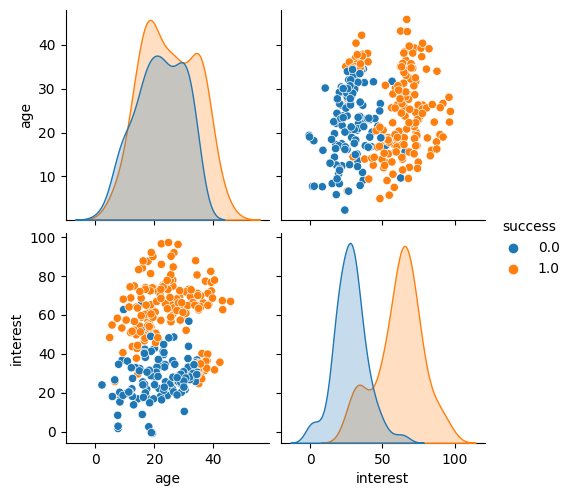

In [ ]:
sns.pairplot(hue = 'success', data = c)

In [ ]:
from sklearn.model_selection import train_test_split

x = c[['age', 'interest']]  #[[]]데이터 프레임으로 저장함
y = c['success']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45, stratify = y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(207, 2) (90, 2) (207,) (90,)


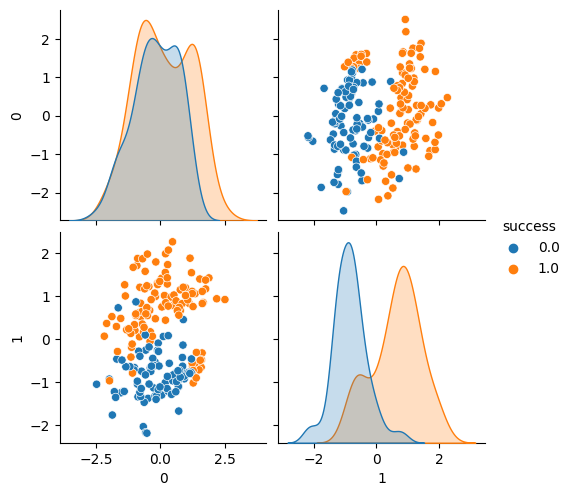

In [ ]:
from sklearn.preprocessing import StandardScaler  # 스케일 변환후 특성 변화가 있음

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

sns.pairplot(data = pd.concat([pd.DataFrame(x_train), y_train.reset_index(drop = True)], axis = 1), hue = 'success')

In [ ]:
from sklearn.svm import SVC

clf = SVC(C = 0.5, random_state= 45)
clf.fit(x_train, y_train)

SVC(C=0.5, random_state=45)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

x_test_score = scaler.transform(x_test)
pred =clf.predict(x_test_score)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rec = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print()
print('정밀도: {}%'.format(round(test_prc*100, 2)))
print('재현율: {}%'.format(round(test_rec*100, 2)))
print('정확도: {}%'.format(round(test_acc*100, 2)))
print('F1_score: {}%'.format(round(test_f1*100, 2)))



[[34  5]
 [ 1 50]]

정밀도: 90.91%
재현율: 98.04%
정확도: 93.33%
F1_score: 94.34%


###ravel()은 NumPy에서 사용되는 배열(array)의 메서드 중 하나로, 다차원 배열을 1차원 배열로 평평하게 펼치는 역할을 함. 다차원 배열을 1차원으로 변환하여 데이터를 쉽게 다룰 수 있도록 도와줌

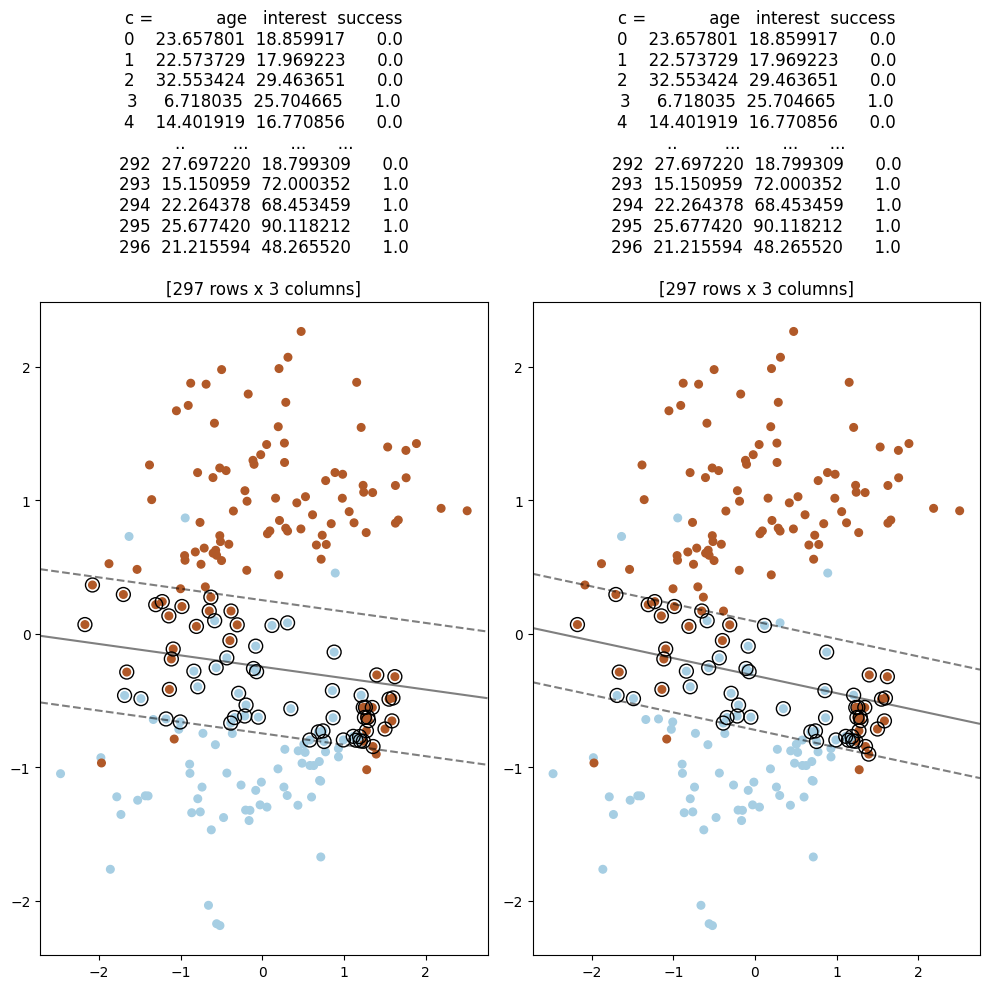

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC

plt.figure(figsize = (10, 10))
for i, C in enumerate([1, 10]):
  clf = LinearSVC(C= C, loss  = 'hinge', random_state = 45).fit(x_train, y_train)

  decision_function = clf.decision_function(x_train)
  support_vectors_indices = np.where(np.abs(decision_function) <=1+1e-15)[0]
  support_vectors = x_train[support_vectors_indices]
  plt.subplot(1,2, i +1)
  plt.scatter(x_train[:,0], x_train[:, 1], c = y_train, s = 30, cmap = plt.cm.Paired)
  ax = plt.gca()
  xlim=ax.get_xlim()
  ylim = ax.get_ylim()
  xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
  z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
  z = z.reshape(xx.shape)
  plt.contour(xx, yy, z, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
  plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s = 100, linewidth = 1, facecolors = 'None', edgecolors = 'k')
  plt.title('c = '+ str(c))
plt.tight_layout()
plt.show()
# clf.decision_function은 SVM 모델에서 사용되는 함수 중 하나로, 주어진 입력 데이터 포인트에 대한
# 결정 함수 값을 계산함.
#  이 결정 함수 값은 데이터 포인트가 결정 경계로부터 얼마나 멀리 떨어져 있는지를 나타내며,
# 이 값에 따라 데이터 포인트의 클래스 레이블을 예측함.
# 일반적으로 decision_function의 결과값이 양수이면 해당 데이터 포인트는 양성 클래스에 속하고,
# 음수이면 음성 클래스에 속함. 값의 절댓값이 클수록 해당 데이터 포인트가 결정 경계에서 멀리
#  떨어져 있음을 의미하며, 값이 작으면 결정 경계에 가까이 위치함.
# 결정 함수 값의 크기는 C 매개변수에 의해 조절되며 C가 작을수록 모델이 오류를 허용하며
# 결정 함수 값의 크기가 작아짐. 반면, C가 클수록 모델이 오류를 허용하지 않으며
# 결정 함수 값의 크기가 커짐. 따라서 C의 값을 조절하여 모델의 오류 허용 정도를 조절할 수 있음.
#
